## Import libraries

In [35]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [36]:
#Loading the dataset
file_path = '/Users/shubray/Desktop/healthcare-dataset-stroke-data.csv'
stroke_data = pd.read_csv(file_path)

In [37]:
# Summary of the dataset
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Separating Numerical and Categorical Variables

In [39]:
# Numerical variables
num_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(num_features))
print('Numerical Variables Column: ',num_features)

Number of numerical variables:  7
Numerical Variables Column:  ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [40]:
# Categorical Variables
cat_features = [feature for feature in stroke_data.columns if stroke_data[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
Categorical variables column name: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


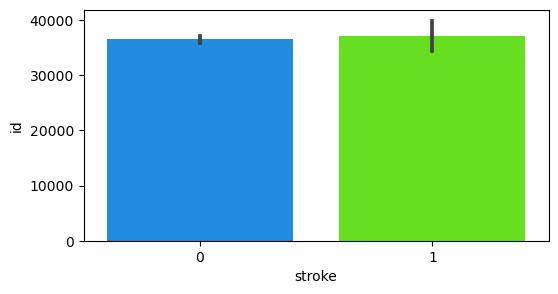

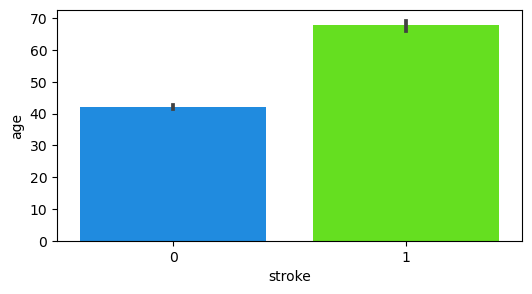

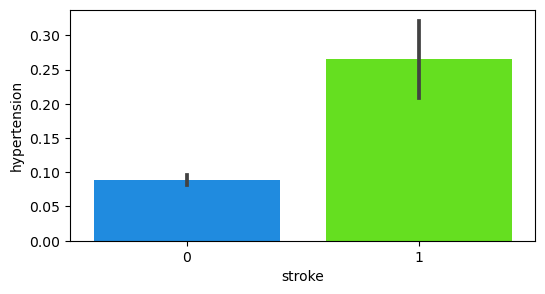

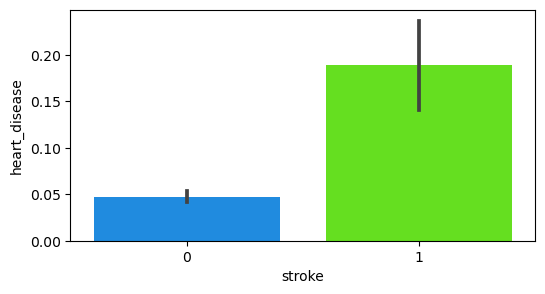

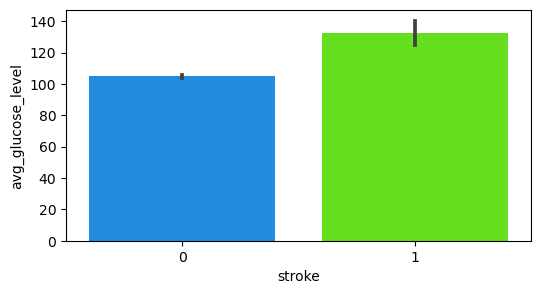

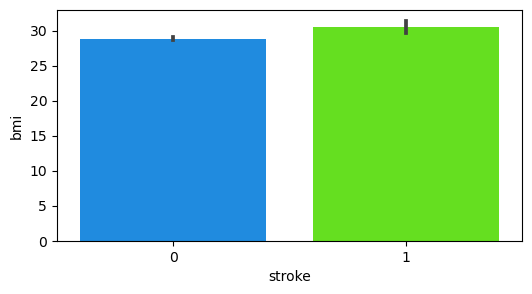

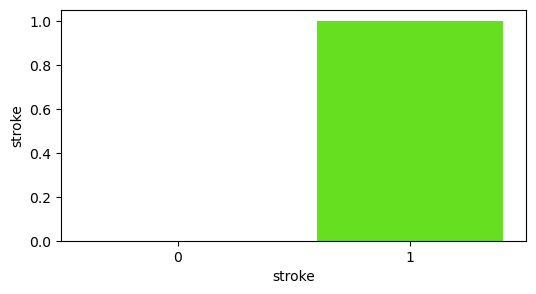

In [41]:
#Plotting the barplot of numerical features
for col in num_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=stroke_data,x='stroke',y=col,palette='gist_rainbow_r')

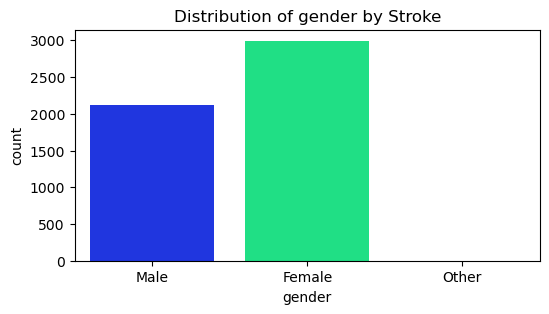

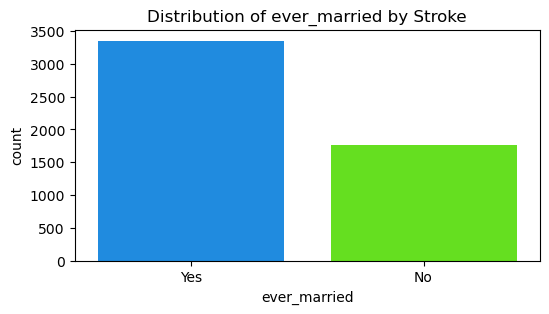

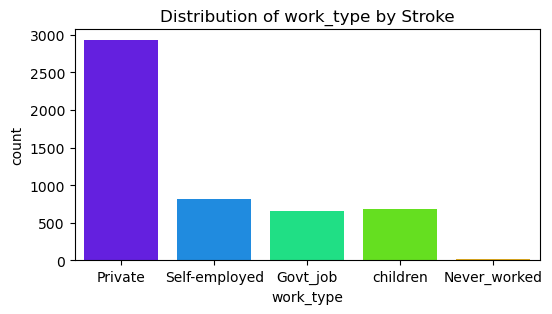

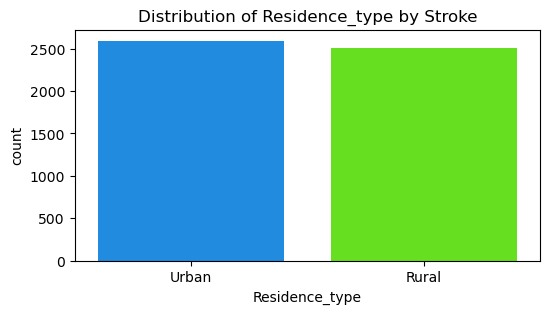

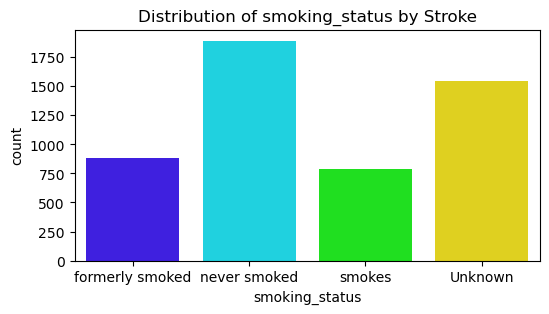

In [42]:
for col in cat_features:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=stroke_data, x=col, palette='gist_rainbow_r')
    plt.title(f'Distribution of {col} by Stroke')
    plt.show() 

In [54]:
# Select only the numeric columns for correlation
numeric_data = stroke_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corr = numeric_data.corr()

## Visualizing the Correlation Matrix with a Heatmap

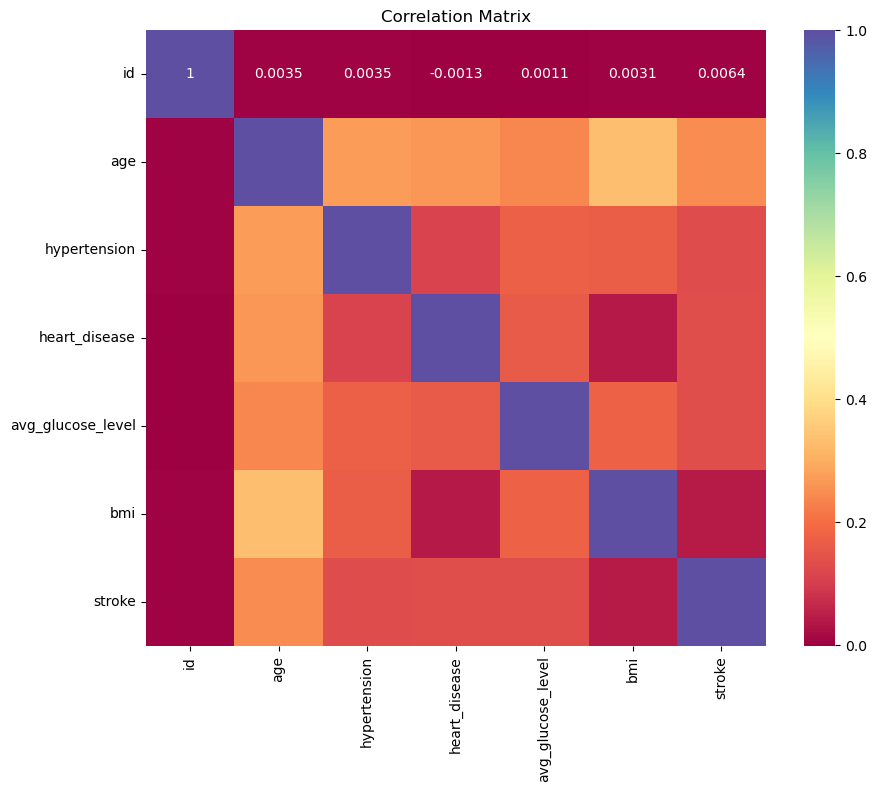

In [64]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")
plt.show()

In [66]:
corr_matrix = numeric_data.corr().round(2)
corr_matrix  

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.00,0.00,0.00,-0.00,0.00,0.00,0.01
age,0.00,1.00,0.28,0.26,0.24,0.33,0.25
hypertension,0.00,0.28,1.00,0.11,0.17,0.17,0.13
heart_disease,-0.00,0.26,0.11,1.00,0.16,0.04,0.13
avg_glucose_level,0.00,0.24,0.17,0.16,1.00,0.18,0.13
bmi,0.00,0.33,0.17,0.04,0.18,1.00,0.04
stroke,0.01,0.25,0.13,0.13,0.13,0.04,1.00


A heatmap visually represents the correlation matrix, making it easier to identify strong and weak correlations at a glance. The diagonal from the top left to the bottom right is all 1. This is because each variable is perfectly correlated with itself. 
There's a moderate positive correlation between age and stroke. This suggests that as age increases, the likelihood of having a stroke also increases.
The correlation seems low to moderate between hypertension and stroke. Hypertension does have a positive relationship with stroke, but it is not very strong.
Again, the correlation is moderate between heart_disease and stroke. Heart disease is positively correlated with stroke occurrence, but the relationship is not as strong as it might be with age.
The correlation appears to be low between avg_glucose_level and stroke, indicating that average glucose levels may not have a strong linear relationship with stroke risk in this dataset.
The correlation is also low between bmi and stroke, suggesting that BMI might not have a strong direct correlation with stroke in this dataset. 
Seeing the matrix, age appears to have the most significant positive correlation with stroke (target variable).